In [7]:
import Base: iterate
using Printf, IterativeSolvers, LinearAlgebra, Random, Distributions, SparseArrays, Arpack,Preconditioners
export cg, cg!, CGSampler, PCGSampler, cgSamp!, CGStateVariables


using FileIO, Colors, Images
temp = load("../docs/img/frame_1.png")
temp = temp[78:808, 257:1077]
temp = Gray.(imresize(temp, 512, 512))
matrixtemp = Float64.(temp)
scale = minimum(matrixtemp[matrixtemp .> 0])



ErrorException: cannot assign a value to variable Distributions.scale from module Main

In [37]:
using DataFrames
result = DataFrame()

Array{Float64,2}

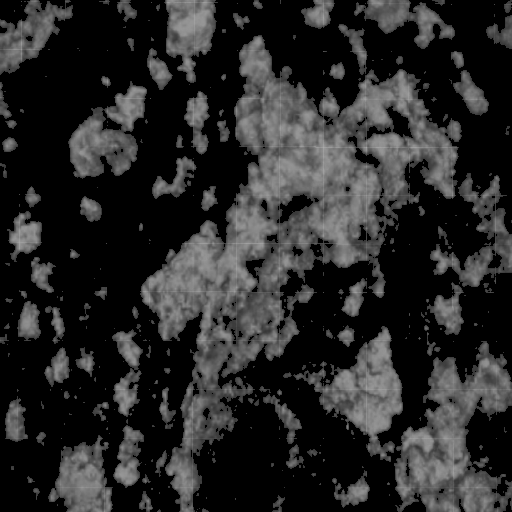

In [328]:
using FileIO, Colors, Images
frame = load("../data/frame40/gframe_40.png")

In [329]:
include("../src/matrixgen.jl")
include("../src/cheby_sampler_basedonJulia.jl")
matrixtemp = Float64.(frame)
y = vec(Int64.(matrixtemp ./ scale)) ./ 10;
        
        
n = 512
W = laplacematrix(n)
x = zeros(512^2)
σ2inv, λ = rand(Distributions.Gamma(1, 10000), 2)
A = σ2inv * sparse(I, n^2, n^2) + λ * W

L = LowerTriangular(A)
p = CholeskyPreconditioner(L, 2)

        
y0 = 0.5*y + 0.5 * mean(y)*ones(512^2)
b= σ2inv .* y



262144-element Array{Float64,1}:
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     0.0           
     ⋮             
 43704.976028965495
 45753.64678032325 
 48485.20778213359 
 49168.09803258618 
 47802.31753168101 
 47119.427281228425
 46436.537030775835
 43704.976028965495
 40290.524776702565
 37558.963774892225
     0.0           
     0.0           

In [330]:
include("../src/pcg_sampler.jl")
samp = cgSamp!(x, A, y0, b;
    tol = 10^-4,
    maxiter= 1000,
    Pl = p)

012345678

PCGSampler{CholeskyPreconditioner{Float64,SparseMatrixCSC{Float64,Int64}},SparseMatrixCSC{Float64,Int64},Array{Float64,1},Array{Float64,1},Float64,Float64}(CholeskyPreconditioner{Float64,SparseMatrixCSC{Float64,Int64}}([29592.43411280454 0.0 … 0.0 0.0; -11381.196744302124 40973.63085710666 … 0.0 0.0; … ; 0.0 0.0 … 40973.63085710666 0.0; 0.0 0.0 … -11381.196744302124 29592.43411280454], 2), 
  [1     ,      1]  =  29592.4
  [2     ,      1]  =  -11381.2
  [513   ,      1]  =  -11381.2
  [1     ,      2]  =  -11381.2
  [2     ,      2]  =  40973.6
  [3     ,      2]  =  -11381.2
  [514   ,      2]  =  -11381.2
  [2     ,      3]  =  -11381.2
  [3     ,      3]  =  40973.6
  [4     ,      3]  =  -11381.2
  [515   ,      3]  =  -11381.2
  [3     ,      4]  =  -11381.2
  ⋮
  [262141, 262141]  =  40973.6
  [262142, 262141]  =  -11381.2
  [261630, 262142]  =  -11381.2
  [262141, 262142]  =  -11381.2
  [262142, 262142]  =  40973.6
  [262143, 262142]  =  -11381.2
  [261631, 262143]  =  -11381.2

In [331]:
include("../src/pcg_cheby.jl")
Lz = lanczos(samp.a, samp.b)

[1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7, 8, 7, 8]

8×8 SparseMatrixCSC{Float64,Int64} with 22 stored entries:
  [1, 1]  =  8.08786e-6
  [2, 1]  =  1.06026e-6
  [1, 2]  =  1.06026e-6
  [2, 2]  =  1.53238e-5
  [3, 2]  =  4.01636e-6
  [2, 3]  =  4.01636e-6
  [3, 3]  =  1.38085e-5
  [4, 3]  =  4.40604e-6
  [3, 4]  =  4.40604e-6
  [4, 4]  =  1.53151e-5
  [5, 4]  =  5.87272e-6
  [4, 5]  =  5.87272e-6
  [5, 5]  =  1.78725e-5
  [6, 5]  =  7.37372e-6
  [5, 6]  =  7.37372e-6
  [6, 6]  =  1.4049e-5
  [7, 6]  =  4.0836e-6
  [6, 7]  =  4.0836e-6
  [7, 7]  =  1.25078e-5
  [8, 7]  =  3.13034e-6
  [7, 8]  =  3.13034e-6
  [8, 8]  =  1.26722e-5

In [332]:
M = eigs(Matrix(Lz); nev=1, ritzvec=false, which=:LM)[1][1] 
m = eigs(Matrix(Lz); nev=1, ritzvec=false, which=:SM)[1][1]


4.95065202216934e-6

In [333]:
include("../etc/cheby_sampler_basedonJulia.jl")
ω = 1.66
cheby = cheby_ssor_sampler!(samp.y, A, ω, real(M), real(m); 𝛎 = zeros(A.n), maxiter = 100)

262144-element Array{Float64,1}:
  6.457588160233089e-5  
  0.0008999802904577091 
  0.0012974081593797341 
  0.0015414226690098865 
  0.0010793005611219313 
 -2.932353240395907e-5  
 -0.00034941211689981156
  0.0006682615918744794 
  0.00044437659495085173
  0.0001798295299945792 
 -0.0006289218626971783 
 -0.0006332576956207639 
 -0.0014361272113306248 
  ⋮                     
  0.05411468847558247   
  0.00529478913198171   
  0.011293677169244593  
 -0.007557117961130979  
  0.02960359070964387   
  0.010694426796162988  
  0.022573842084413383  
  0.027693946761848807  
  0.01678424819158552   
 -0.04174169575224576   
  0.007405715825569132  
 -0.005398605616731828  

In [334]:
pc_samp, pc_root = cheby + samp.x, samp.x

([6.675834842157291e-5, 0.0009031464484091776, 0.0013034415055542359, 0.0015539400791162153, 0.0011061076735518782, 2.8916097735965648e-5, -0.00022200882112918726, 0.0009476674688962104, 0.0010570278560855509, 0.0015212078986124792  …  5.313241943545273, 5.35508651111112, 5.18960686016951, 4.765194012826356, 4.1527999033897585, 3.6180786128198403, 3.0755179767114496, 2.3172685413025405, 1.0018349597936855, 0.5479705220775452], [2.1824668192420226e-6, 3.166157951468474e-6, 6.033346174501739e-6, 1.2517410106328663e-5, 2.6807112429946828e-5, 5.823963013992472e-5, 0.0001274032957706243, 0.000279405877021731, 0.000612651261134699, 0.0013413783686179  …  5.301948266376028, 5.362643629072251, 5.1600032694598665, 4.754499586030193, 4.130226061305345, 3.5903846660579917, 3.058733728519864, 2.359010237054786, 0.9944292439681165, 0.5533691276942769])

In [335]:
result.f40 = pc_samp
result

,f2,f1,f3,f4,f5,f6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.000385124,-0.000447743,-0.000856766,-0.000354,-0.000300065,0.000177484
2,-8.27124e-5,0.00241036,0.000258922,0.000337461,-0.000185551,0.000407246
3,5.78464e-6,-0.000393075,0.000125026,-0.00038401,-0.000262971,0.000137478
4,-0.000283378,0.000271531,0.000473136,-0.00033051,-0.000177099,0.000565822
5,-0.000127926,-0.00140177,-0.000104182,-0.000588793,-0.000477526,0.000770687
6,-8.46861e-5,-0.000524595,-0.000123415,-0.000331792,-0.000418704,0.000800621
7,-0.000899107,0.000604888,-0.000305326,-0.000185148,-0.000101412,0.00092907
8,-0.00049773,0.00202583,-0.000111348,0.000234854,-0.000255502,0.000908756
9,-0.000694085,0.00317963,-0.000438461,2.26979e-5,-8.58653e-5,0.00202067


In [2]:
using Plots;

volume = [sum(result[!,i]) for i in 1:40]
volume[1], volume[2] = volume[2], volume[1]
volume

40-element Array{Float64,1}:
 1.1437027817477875e6
 1.1630121043594524e6
 1.1629521288145145e6
 1.1439122207544951e6
 1.1438764312806102e6
 1.1441312102092253e6
 1.1441527299233754e6
 1.1371978828481704e6
 1.1377536684209101e6
 1.138801295493279e6 
 1.1388040675621103e6
 1.1500790447302968e6
 1.1510680944173313e6
 ⋮                   
 1.162224858950762e6 
 1.161610516924897e6 
 1.1606091473670262e6
 1.1577099404733954e6
 1.1577491873727879e6
 1.1473215321653136e6
 1.1470848523979932e6
 1.135618336776471e6 
 1.1357094236224717e6
 1.0906924081382672e6
 1.0901684819066874e6
 1.0717370835939352e6

In [1]:
using CSV
result = CSV.read("output.csv")


,f2,f1,f3,f4,f5,f6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.000385124,-0.000447743,-0.000856766,-0.000354,-0.000300065,0.000177484
2,-8.27124e-5,0.00241036,0.000258922,0.000337461,-0.000185551,0.000407246
3,5.78464e-6,-0.000393075,0.000125026,-0.00038401,-0.000262971,0.000137478
4,-0.000283378,0.000271531,0.000473136,-0.00033051,-0.000177099,0.000565822
5,-0.000127926,-0.00140177,-0.000104182,-0.000588793,-0.000477526,0.000770687
6,-8.46861e-5,-0.000524595,-0.000123415,-0.000331792,-0.000418704,0.000800621
7,-0.000899107,0.000604888,-0.000305326,-0.000185148,-0.000101412,0.00092907
8,-0.00049773,0.00202583,-0.000111348,0.000234854,-0.000255502,0.000908756
9,-0.000694085,0.00317963,-0.000438461,2.26979e-5,-8.58653e-5,0.00202067


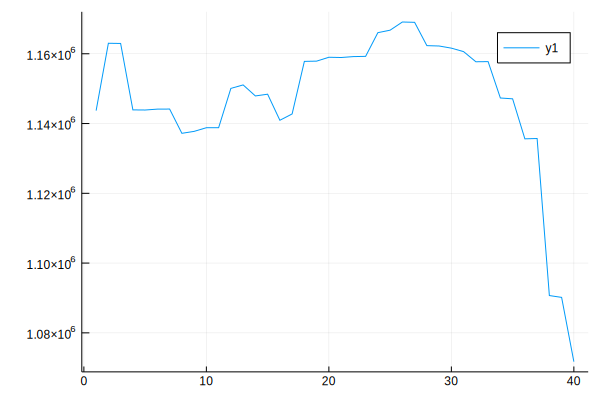

In [3]:
plt = Plots.plot(volume)


In [338]:
using CSV
CSV.write("output.csv", result)

┌ Info: Recompiling stale cache file /Users/minji/.julia/compiled/v1.2/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1240


"output.csv"

In [4]:
using Images
Images.save("run_1_times.png", plt)

┌ Warning: Mapping to the storage type failed; perhaps your data had out-of-range values?
│ Try `map(clamp01nan, img)` to clamp values to a valid range.
└ @ ImageMagick /Users/minji/.julia/packages/ImageMagick/vMfoS/src/ImageMagick.jl:167


In [2]:
include("../src/pcg_sampler.jl")
include("../src/matrixgen.jl")

using FileIO, Colors, Images
using DataFrames
df = DataFrame()

function samp_biofilm(scale)
    for i in 1:1000
        
        frame = load("../data/frame40/gframe_1.png")

        matrixtemp = Float64.(frame)
        y = vec(Int64.(matrixtemp ./ scale)) ./ 10;
        
        
        n = 512
        W = laplacematrix(n)
        x = zeros(512^2)
        σ2inv, λ = rand(Distributions.Gamma(1, 10000), 2)
        A = σ2inv * sparse(I, n^2, n^2) + λ * W

        L = LowerTriangular(A)
        p = CholeskyPreconditioner(L, 2)

        
        y0 = 0.5*y + 0.5 * mean(y)*ones(512^2)
        b= σ2inv .* y
        try
            print(i)
           samp = cgSamp!(x, A, y0, b;
                tol = 10^-4,
                maxiter= 1000,
                Pl = p)
            Lz = lanczos(samp.a, samp.b)
            M = eigs(Matrix(Lz); nev=1, ritzvec=false, which=:LM)[1][1] 
            m = eigs(Matrix(Lz); nev=1, ritzvec=false, which=:SM)[1][1]
        
            ω = 1.66
            cheby = cheby_ssor_sampler!(samp.y, A, ω, real(M), real(m); 𝛎 = zeros(A.n), maxiter = 100)
            pc_samp, pc_root = cheby + samp.x, samp.x
       catch e
            print("e")
           continue
       end
        
        df[!,i] = pc_samp
    end
end

###This code kills Kernel 

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


samp_biofilm (generic function with 1 method)

In [ ]:
samp_biofilm(scale)